# Evaluation

We can use the forward or backward algorithms to evaluate the probability of obtaining a sequence given a model —
$P(x|\theta)$
where $x = x_1, x_2... x_N$ is a sequence and $\theta$ is an HMM with $k$ states $\pi_1,\pi_2... \pi_k$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import hmm

np.random.seed(0)

Let's import the `transition`, `emission` and `init` matrices that define the HMM. 

In [2]:
transition = pd.read_csv("cpg_hmm_1/transition.csv",index_col=0)
emission = pd.read_csv("cpg_hmm_1/emission.csv",index_col=0)
init = pd.read_csv("cpg_hmm_1/init.csv",index_col=0)

Generate a DNA sequence of length 10 under the HMM.

In [3]:
st, seq = hmm.generate(transition, emission, init, 10)

In [4]:
print(st)
print(seq)

+++++++---
GTGGCTGAGG


## Forward Algorithm

The forward ($F$) matrix has to be initialised and filled up similar to the viterbi algorithm, except instead of calculating the maximum probability, we sum over the probabilities. The elements of $F$ are

$$F_{i,j} = P(x_1,x_2...x_j,\pi_i)$$

In [5]:
k = np.shape(emission)[0]
N = np.size(list(seq))
F = np.zeros([k,N]) #forward matrix
F[:,0] = init*emission[seq[0]] #initialize

#fill up
for j in range(1,N):
    for i in range(0,k):
        possibles = F[:,j-1]*(transition.iloc[:,i])*(emission[seq[j]][i])
        F[i,j] = np.sum(possibles)

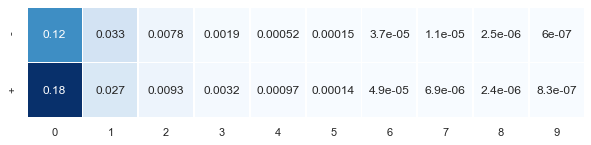

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(F,square=True,cbar=False,linewidth = 1,cmap='Blues',yticklabels=list(transition.columns),annot=True);

In [7]:
P = np.sum(F[:,N-1])
print("P =",P)

P = 1.4366902641444733e-06


P is the probability $P(x|\theta)$ which can also be written as $P(x)$ since we can take for granted that all probabilities are with respect to the HMM we have been given.

## Backward Algorithm

We can do the same thing by filling up the backward ($B$) matrix with the backward algorithm. But now,

$$B_{i,j} = P(x_{j+1},x_{j+2}...|\pi_i)$$



In [8]:
B = np.zeros([k,N]) #forward matrix
B[:,-1] = 1 #initialize

#fill up
for j in range(N-2,-1,-1):
    for i in range(0,k):
        possibles = B[:,j+1]*(transition.T.iloc[:,i])*(emission[seq[j+1]])
        B[i,j] = np.sum(possibles)

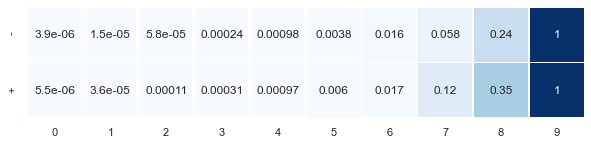

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(B,square=True,cbar=False,linewidth = 1,cmap='Blues',yticklabels=list(transition.columns),annot=True);

In [10]:
P = np.sum(np.array(emission[seq[0]]*B[:,0]*init))
print("P = ",P)

P =  1.4366902641444729e-06


Again, P is the probability $P(x)$. We can see that the forward and backward algorithms give the same answers.

## Comparing two HMMs

Let's return to the CpG island problem and see if we can decide which model is more likely to have generated a sequence.

In [11]:
transition_1 = pd.read_csv("cpg_hmm_1/transition.csv",index_col=0)
emission_1 = pd.read_csv("cpg_hmm_1/emission.csv",index_col=0)
init_1 = pd.read_csv("cpg_hmm_1/init.csv",index_col=0)

transition_2 = hmm.transition_Durbin_CpG(1/20,1/20)
emission_2 = pd.read_csv("cpg_hmm_2/emission.csv",index_col=0)
init_2 = pd.read_csv("cpg_hmm_2/init.csv",index_col=0)

In [12]:
seq = ("CGGCGGCGCATGCATCTCTCGAAGCAGCAGCAGCAACAGAGGCGTCT"
       "CATAAGTGCATGCGCAGCAGCGGTAGCAGCGGTGGTGGCAGCAGCAGGGAGATTTCATTGCTGCAGTCGCCAAATTACATGCATCCTACGACT")
# a portion on the D.mel X chromosome

In [13]:
P_1,_ = hmm.forward(seq,transition_1,emission_1,init_1)
print(P_1)

2.4294265533073766e-84


In [14]:
P_2,_ = hmm.forward(seq,transition_2,emission_2,init_2)
print(P_2)

4.0719510945970887e-84


In [15]:
P_1>P_2

False

Therefore, the sequence is more likely to have come from the refined HMM in this case.